Anda akan ditugaskan dengan pertanyaan bisnis dari berbagai tim. Tugas Anda adalah memenuhi apa yang diinginkan oleh manajer Anda dari pertanyaan bisnis tersebut. Anda akan menggunakan dataset `stackoverflow.csv`.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('stackoverflow.csv')
df.head()

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False
2,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830.0,1371484.0,2015-01-05 19:52:02.710000 UTC,1.0,1.0,False
3,27745803,4413122.0,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27880982.0,428664.0,2015-01-10 20:38:15.840000 UTC,0.0,2.0,False
4,27748870,390973.0,NaN,BigQuery Cross Join Much Faster with Each,<p>I'm trying to look at user activity by date...,2015-01-02 21:38:00.870000 UTC,1,bq,27785857.0,3257867.0,2015-01-05 18:46:51.560000 UTC,6.0,0.0,True


In [3]:
df.shape

(6795, 14)

Data `df` yang digunakan terdiri dari 6795 baris dan 14 kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   question_id              6795 non-null   int64  
 1   question_owner_user_id   6761 non-null   float64
 2   question_owner_location  2770 non-null   object 
 3   question_title           6795 non-null   object 
 4   question_body            6795 non-null   object 
 5   question_created_date    6795 non-null   object 
 6   question_score           6795 non-null   int64  
 7   question_tag             6795 non-null   object 
 8   answer_id                6393 non-null   float64
 9   answerer_user_id         6385 non-null   float64
 10  answer_created_date      6393 non-null   object 
 11  answer_score             6393 non-null   float64
 12  answer_comment_count     6393 non-null   float64
 13  is_accepted_answer       6795 non-null   bool   
dtypes: bool(1), float64(5), 

Cek duplikat dari data `df`.

In [5]:
df.duplicated().sum()

0

# Case 1: Marketing by Topic
Tim marketing butuh membuat banyak digital banner untuk menarik orang-orang mengunjungi Stack Overflow. Mereka mempunyai ide untuk membuat marketing berdasarkan tag. Ide tersebut menunjukkan seberapa banyak pertanyaan yang relevan terdapat pada platform untuk kebutuhan masyarakat. Mereka ingin menunjukkan contoh pertanyaan yang ada di platform dan menunjukkan seberapa banyak pertanyaan yang sudah ditanyakan dalam platform sejauh ini.

Manajer Anda meminta Anda untuk membuat metrics calculation sesuai kebutuhan dan menunjukkannya dalam line chart dengan setiap tag mempunyai chart. Single line menyatakan tahun pertanyaan ditanyakan. Trennya harus berdasarkan bulan.

Menyiapkan subset data yang diperlukan. Kita tidak memerlukan semua kolom. Hanya kolom tertentu yang digunakan.

In [6]:
kasus1 = df[['question_id', 'question_owner_user_id', 'question_created_date', 'question_tag']]
kasus1.head()

,question_id,question_owner_user_id,question_created_date,question_tag
0,27733458,3769827.0,2015-01-01 18:31:22.693000 UTC,bq
1,27734669,2238969.0,2015-01-01 21:04:30.070000 UTC,bq
2,27745803,4413122.0,2015-01-02 17:09:50.047000 UTC,bq
3,27745803,4413122.0,2015-01-02 17:09:50.047000 UTC,bq
4,27748870,390973.0,2015-01-02 21:38:00.870000 UTC,bq


Cek duplikat dari data `kasus1`.

In [7]:
kasus1.duplicated().sum()

2198

Melihat data `kasus1` yang duplikat.

In [8]:
kasus1[kasus1.duplicated()]

,question_id,question_owner_user_id,question_created_date,question_tag
3,27745803,4413122.0,2015-01-02 17:09:50.047000 UTC,bq
5,27748870,390973.0,2015-01-02 21:38:00.870000 UTC,bq
7,27756994,367985.0,2015-01-03 16:36:14.057000 UTC,bq
9,27784743,3618165.0,2015-01-05 17:32:14.280000 UTC,bq
11,27788344,3273514.0,2015-01-05 21:38:32.263000 UTC,bq
...,...,...,...,...
6782,47998766,8903007.0,2017-12-27 21:19:55.587000 UTC,bq
6784,48000058,6737845.0,2017-12-28 00:10:13.330000 UTC,bq
6790,48031187,9074806.0,2017-12-30 05:14:38.143000 UTC,data-studio
6791,48031187,9074806.0,2017-12-30 05:14:38.143000 UTC,data-studio


Melihat salah satu `question_id` dari `kasus1` yang duplikat.

In [9]:
kasus1[kasus1['question_id'] == 27788344]

,question_id,question_owner_user_id,question_created_date,question_tag
10,27788344,3273514.0,2015-01-05 21:38:32.263000 UTC,bq
11,27788344,3273514.0,2015-01-05 21:38:32.263000 UTC,bq


Menghapus data yang duplikat.

In [10]:
kasus1 = kasus1.drop_duplicates()

Mengecek null values data `kasus1`.

In [11]:
kasus1.isna().sum()

question_id                0
question_owner_user_id    20
question_created_date      0
question_tag               0
dtype: int64

null values pada kolom `question_owner_user_id` dari `kasus1` dapat diabaikan karena tidak mengganggu proses analisis.

Menambah kolom `year` dan `month` dari kolom `question_created_date` pada data `kasus1`.

In [12]:
kasus1['year'] = pd.to_datetime(kasus1['question_created_date']).dt.year
kasus1['month'] = pd.to_datetime(kasus1['question_created_date']).dt.month
kasus1.head()

,question_id,question_owner_user_id,question_created_date,question_tag,year,month
0,27733458,3769827.0,2015-01-01 18:31:22.693000 UTC,bq,2015,1
1,27734669,2238969.0,2015-01-01 21:04:30.070000 UTC,bq,2015,1
2,27745803,4413122.0,2015-01-02 17:09:50.047000 UTC,bq,2015,1
4,27748870,390973.0,2015-01-02 21:38:00.870000 UTC,bq,2015,1
6,27756994,367985.0,2015-01-03 16:36:14.057000 UTC,bq,2015,1


In [13]:
kasus1.shape

(4597, 6)

Data `kasus1` terdiri dari 4597 baris dan 6 kolom.

Cek unique values dari kolom `question_tag` pada `kasus1`.

In [14]:
print(kasus1['question_tag'].unique())

['bq' 'data-studio' 'looker']


In [15]:
kasus1['question_tag'].value_counts()

bq             4471
data-studio     119
looker            7
Name: question_tag, dtype: int64

Cek unique values dari kolom `year` pada `kasus1`.

In [16]:
print(kasus1['year'].unique())

[2015 2016 2017]


In [17]:
kasus1['year'].value_counts()

2017    2135
2016    1539
2015     923
Name: year, dtype: int64

Cek unique values dari kolom `month` pada `kasus1`.

In [18]:
print(kasus1['month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [19]:
kasus1['month'].value_counts()

6     432
11    425
10    424
7     422
8     405
3     391
5     379
4     376
1     350
12    348
9     345
2     300
Name: month, dtype: int64

## BigQuery

Hanya mengambil data yang `question_tag` berupa 'bq' pada `kasus1`.

In [20]:
bq1 = kasus1.loc[kasus1['question_tag'] == 'bq', :]
bq1.head()

,question_id,question_owner_user_id,question_created_date,question_tag,year,month
0,27733458,3769827.0,2015-01-01 18:31:22.693000 UTC,bq,2015,1
1,27734669,2238969.0,2015-01-01 21:04:30.070000 UTC,bq,2015,1
2,27745803,4413122.0,2015-01-02 17:09:50.047000 UTC,bq,2015,1
4,27748870,390973.0,2015-01-02 21:38:00.870000 UTC,bq,2015,1
6,27756994,367985.0,2015-01-03 16:36:14.057000 UTC,bq,2015,1


Melihat jumlah pertanyaan yang dibuat berdasarkan tahun dan bulan.

In [21]:
bq1.groupby(['month', 'year'])['question_id'].count().unstack()

year,2015,2016,2017
month,,,
1,57,114,169
2,67,98,129
3,69,114,198
4,75,116,177
5,79,108,187
6,92,133,199
7,78,142,199
8,69,180,152
9,81,113,134


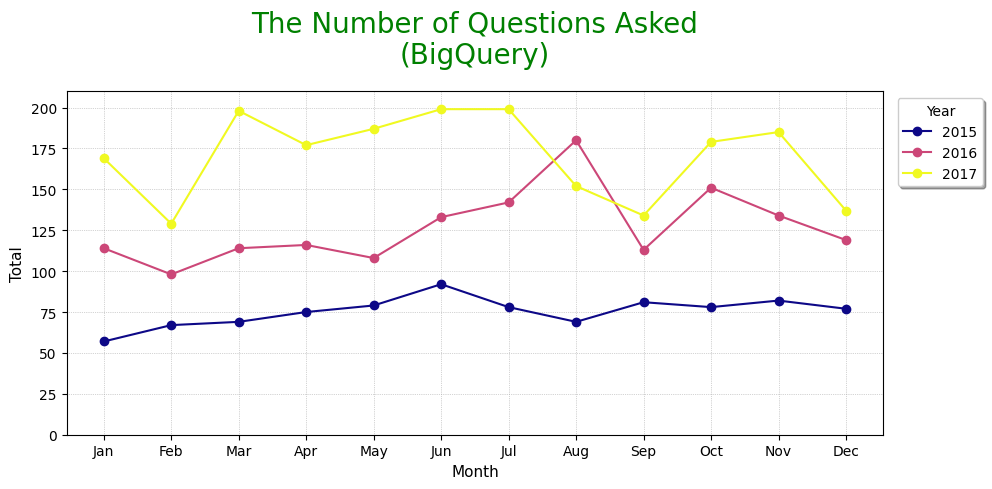

In [22]:
bq1.groupby(['month', 'year'])['question_id'].count().unstack().plot(marker = 'o', cmap = 'plasma')
plt.title('The Number of Questions Asked\n(BigQuery)', loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Month', fontsize = 11)
plt.ylabel('Total', fontsize = 11)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(ymin = 0, ymax = 210)
plt.legend(title = 'Year', loc = 'upper center', bbox_to_anchor = (1.07, 1), shadow = True)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

## Data-Studio

Hanya mengambil data yang `question_tag` berupa 'data-studio' pada `kasus1`.

In [23]:
ds1 = kasus1.loc[kasus1['question_tag'] == 'data-studio', :]
ds1.head()

,question_id,question_owner_user_id,question_created_date,question_tag,year,month
50,28049326,1166924.0,2015-01-20 15:38:04.110000 UTC,data-studio,2015,1
56,28106196,1166924.0,2015-01-23 08:57:03.417000 UTC,data-studio,2015,1
162,28594848,3629382.0,2015-02-18 22:05:03.020000 UTC,data-studio,2015,2
172,28632358,1234456.0,2015-02-20 15:20:46.567000 UTC,data-studio,2015,2
225,28929634,1159404.0,2015-03-08 17:32:49.933000 UTC,data-studio,2015,3


Melihat jumlah pertanyaan yang dibuat berdasarkan tahun dan bulan.

In [24]:
ds1.groupby(['month', 'year'])['question_id'].count().unstack()

year,2015,2016,2017
month,,,
1,2.0,2.0,6.0
2,2.0,NaN,4.0
3,2.0,2.0,6.0
4,3.0,2.0,3.0
5,NaN,1.0,3.0
6,1.0,2.0,4.0
7,NaN,NaN,2.0
8,NaN,NaN,4.0
9,2.0,1.0,14.0


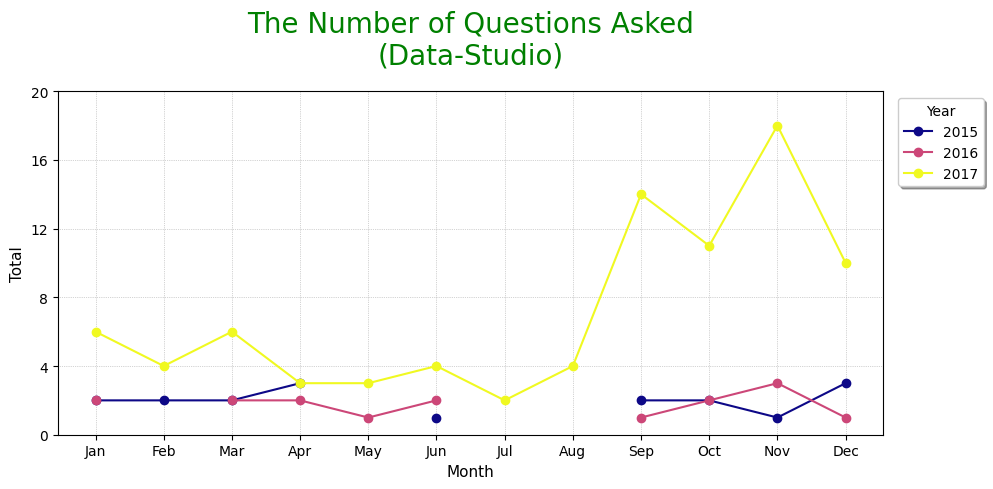

In [25]:
ds1.groupby(['month', 'year'])['question_id'].count().unstack().plot(marker = 'o', cmap = 'plasma')
plt.title('The Number of Questions Asked\n(Data-Studio)', loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Month', fontsize = 11)
plt.ylabel('Total', fontsize = 11)
labels, locations = plt.yticks()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, 21, 4))
plt.legend(title = 'Year', loc = 'upper center', bbox_to_anchor = (1.07, 1), shadow = True)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

## Looker

Hanya mengambil data yang `question_tag` berupa 'looker' pada `kasus1`.

In [26]:
looker1 = kasus1.loc[kasus1['question_tag'] == 'looker', :]
looker1

,question_id,question_owner_user_id,question_created_date,question_tag,year,month
1223,33748248,5570120.0,2015-11-17 02:42:45.800000 UTC,looker,2015,11
2130,36977862,1283776.0,2016-05-02 08:09:23.793000 UTC,looker,2016,5
5284,44778137,8196937.0,2017-06-27 10:34:44.797000 UTC,looker,2017,6
5602,45344600,3649361.0,2017-07-27 07:54:31.067000 UTC,looker,2017,7
6180,46776128,8216953.0,2017-10-16 17:45:12.290000 UTC,looker,2017,10
6336,47062044,2542922.0,2017-11-01 19:11:35.847000 UTC,looker,2017,11
6673,47749398,2060880.0,2017-12-11 09:06:25.383000 UTC,looker,2017,12


Melihat jumlah pertanyaan yang dibuat berdasarkan tahun dan bulan.

In [27]:
looker1.groupby(['month', 'year'])['question_id'].count().unstack()

year,2015,2016,2017
month,,,
5,NaN,1.0,NaN
6,NaN,NaN,1.0
7,NaN,NaN,1.0
10,NaN,NaN,1.0
11,1.0,NaN,1.0
12,NaN,NaN,1.0


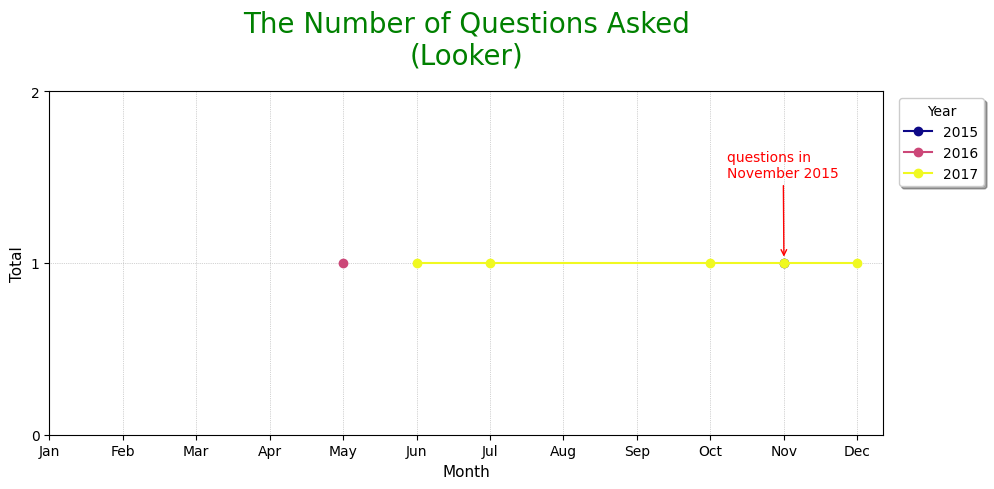

In [28]:
looker1.groupby(['month', 'year'])['question_id'].count().unstack().plot(marker = 'o', cmap = 'plasma')
plt.title('The Number of Questions Asked\n(Looker)', loc = 'center', pad = 20, fontsize = 20, color = 'green')
plt.xlabel('Month', fontsize = 11)
plt.ylabel('Total', fontsize = 11)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(range(0, 3, 1))
plt.annotate('questions in\nNovember 2015', xy = (11, 1.02), xytext = (10.23, 1.5), color = 'red',
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc', color = 'red'))
plt.legend(title = 'Year', loc = 'upper center', bbox_to_anchor = (1.07, 1), shadow = True)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

# Case 2: Brand Ambassador Selection
Tim branding ingin menampilkan penulis jawaban populer di setiap tag untuk peluncuran worldwide brand ambassador di Youtube. Mereka ingin memiliki setidaknya 10 kandidat teratas di setiap tag.

Manajer Anda meminta Anda untuk memastikan bahwa hanya penulis yang mendapatkan accepted answer paling banyak yang terpilih. Penulis juga tidak pernah mendapat skor minus untuk sebuah jawaban.

Menyiapkan subset data yang diperlukan. Kita tidak memerlukan semua kolom. Hanya kolom tertentu yang digunakan.

In [29]:
kasus2 = df[['question_tag', 'answer_id', 'answerer_user_id', 'answer_score', 'is_accepted_answer']]
kasus2.head()

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
0,bq,27787398.0,1371484.0,1.0,False
1,bq,27751284.0,3624307.0,1.0,False
2,bq,27786830.0,1371484.0,1.0,False
3,bq,27880982.0,428664.0,0.0,False
4,bq,27785857.0,3257867.0,6.0,True


Cek duplikat dari data `kasus2`.

In [30]:
kasus2.duplicated().sum()

399

Melihat data `kasus2` yang duplikat.

In [31]:
kasus2[kasus2.duplicated()]

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
122,bq,NaN,NaN,NaN,False
126,bq,NaN,NaN,NaN,False
169,bq,NaN,NaN,NaN,False
288,bq,NaN,NaN,NaN,False
311,bq,NaN,NaN,NaN,False
...,...,...,...,...,...
6742,bq,NaN,NaN,NaN,False
6754,bq,NaN,NaN,NaN,False
6755,bq,NaN,NaN,NaN,False
6759,bq,NaN,NaN,NaN,False


Data yang duplikat pada `kasus2` dipengaruhi oleh null values. Hapus terlebih dahulu data yang duplikat kemudian cek null values data `kasus2`.

In [32]:
kasus2 = kasus2.drop_duplicates()

In [33]:
kasus2.isna().sum()

question_tag           0
answer_id              3
answerer_user_id      11
answer_score           3
is_accepted_answer     0
dtype: int64

Melihat data `kasus2` yang mempunyai null values.

In [34]:
kasus2[kasus2.isnull().any(axis = 1)]

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
20,bq,56973201.0,NaN,2.0,False
50,data-studio,NaN,NaN,NaN,False
57,bq,NaN,NaN,NaN,False
802,bq,31793685.0,NaN,2.0,False
1160,bq,57226034.0,NaN,0.0,False
1501,data-studio,34807830.0,NaN,0.0,False
1904,bq,36233018.0,NaN,1.0,False
2560,bq,38376236.0,NaN,3.0,False
2603,bq,38498139.0,NaN,1.0,True
3191,bq,54284633.0,NaN,3.0,False


Data dengan kolom `answerer_user_id` yang mengandung null values perlu dihapus pada `kasus2`.

In [35]:
kasus2 = kasus2.dropna(subset = ['answerer_user_id'])

In [36]:
kasus2.shape

(6385, 5)

Data `kasus2` terdiri dari 6385 baris dan 5 kolom.

Cek unique values dari kolom `question_tag` pada `kasus2`.

In [37]:
print(kasus2['question_tag'].unique())

['bq' 'data-studio' 'looker']


In [38]:
kasus2['question_tag'].value_counts()

bq             6199
data-studio     179
looker            7
Name: question_tag, dtype: int64

Cek unique values dari kolom `is_accepted_answer` pada `kasus2`.

In [39]:
print(kasus2['is_accepted_answer'].unique())

[False  True]


In [40]:
kasus2['is_accepted_answer'].value_counts()

False    3679
True     2706
Name: is_accepted_answer, dtype: int64

Cek distribusi dari `answer_score` pada `kasus2`.

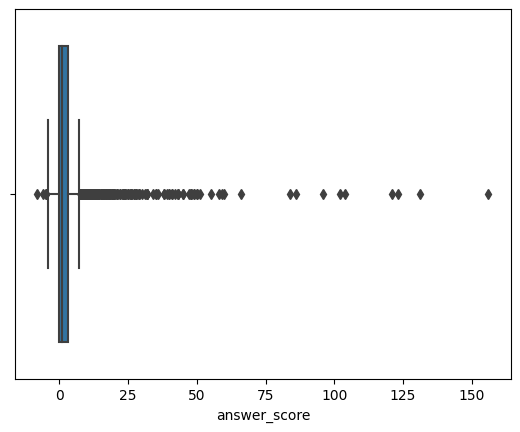

In [41]:
sns.boxplot(data = kasus2, x = 'answer_score')
plt.show()

## BigQuery

Hanya mengambil data yang `question_tag` berupa 'bq' pada `kasus2`.

In [42]:
bq2 = kasus2[kasus2['question_tag'] == 'bq']
bq2.head()

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
0,bq,27787398.0,1371484.0,1.0,False
1,bq,27751284.0,3624307.0,1.0,False
2,bq,27786830.0,1371484.0,1.0,False
3,bq,27880982.0,428664.0,0.0,False
4,bq,27785857.0,3257867.0,6.0,True


Melihat `answerer_user_id` yang pernah mendapatkan minus score untuk `question_tag` 'bq'.

In [43]:
minus_score_bq = bq2[bq2['answer_score'] < 0]
minus_score_bq.head()

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
64,bq,28191353.0,4502697.0,-3.0,False
148,bq,50569234.0,7296501.0,-1.0,False
257,bq,29119305.0,132438.0,-2.0,False
445,bq,45510104.0,8417967.0,-1.0,False
491,bq,30381933.0,4921951.0,-2.0,False


Melihat jumlah `is_accepted_answer` yang 'True' dan 'False' untuk masing-masing `answerer_user_id` dengan `question_tag` 'bq'.

In [44]:
bq_answer = pd.DataFrame(bq2.groupby(['answerer_user_id', 'is_accepted_answer']).size())
bq_answer.rename(columns = {0: 'total'}, inplace = True)
bq_answer

,,total
answerer_user_id,is_accepted_answer,
4279.0,False,1
4323.0,True,1
4494.0,False,1
7031.0,False,1
7587.0,True,1
...,...,...
19206739.0,False,1
19259511.0,False,1
19355112.0,False,1


Menampilkan top 10 dengan total `is_accepted_answer` 'True' terbanyak dan tidak pernah mendapatkan minus score.

In [45]:
bq_answer.reset_index(inplace = True)
top_bq = bq_answer.set_index('answerer_user_id')
top_bq = top_bq.drop(list(minus_score_bq['answerer_user_id'].unique()))
top_bq = top_bq[top_bq['is_accepted_answer'] == True]['total']
top_bq = top_bq.sort_values(ascending = False).reset_index()
top_bq.head(10)

,answerer_user_id,total
0,6253347.0,203
1,243782.0,169
2,4490873.0,123
3,2877278.0,96
4,1375400.0,57
5,4001094.0,46
6,1366527.0,45
7,1144035.0,43
8,5071793.0,27
9,1371484.0,24


### Data-Studio

Hanya mengambil data yang `question_tag` berupa 'data-studio' pada `kasus2`.

In [46]:
ds2 = kasus2[kasus2['question_tag'] == 'data-studio']
ds2.head()

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
56,data-studio,52426912.0,9525344.0,0.0,False
162,data-studio,30641864.0,3169049.0,3.0,False
163,data-studio,35297256.0,5904307.0,0.0,False
172,data-studio,28636493.0,154726.0,1.0,True
225,data-studio,31778412.0,1130145.0,0.0,False


Melihat `answerer_user_id` yang pernah mendapatkan minus score untuk `question_tag` 'data-studio'.

In [47]:
minus_score_ds = ds2[ds2['answer_score'] < 0]
minus_score_ds

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
1891,data-studio,36445311.0,2293534.0,-1.0,False
4860,data-studio,51543264.0,10140223.0,-1.0,False
5883,data-studio,70592929.0,8148244.0,-1.0,False
6757,data-studio,69497835.0,3911923.0,-1.0,False


Melihat jumlah `is_accepted_answer` yang 'True' dan 'False' untuk masing-masing `answerer_user_id` dengan `question_tag` 'data-studio'.

In [48]:
ds_answer = pd.DataFrame(ds2.groupby(['answerer_user_id', 'is_accepted_answer']).size())
ds_answer.rename(columns = {0: 'total'}, inplace = True)
ds_answer

total
answerer_user_id is_accepted_answer       
27048.0          True                    1
154640.0         True                    1
154726.0         False                   1
                 True                    1
272031.0         False                   1
...                                    ...
12892553.0       False                   4
                 True                    2
13211522.0       False                   1
14049988.0       False                   1
14947304.0       False                   1

[129 rows x 1 columns]

Menampilkan top 10 dengan total `is_accepted_answer` 'True' terbanyak dan tidak pernah mendapatkan minus score.

In [49]:
ds_answer.reset_index(inplace = True)
top_ds = ds_answer.set_index('answerer_user_id')
top_ds = top_ds.drop(list(minus_score_ds['answerer_user_id'].unique()))
top_ds = top_ds[top_ds['is_accepted_answer'] == True]['total']
top_ds = top_ds.sort_values(ascending = False).reset_index()
top_ds.head(10)

,answerer_user_id,total
0,4024072.0,13
1,3832970.0,6
2,12892553.0,2
3,5959625.0,2
4,5032191.0,1
5,4213274.0,1
6,4487639.0,1
7,4605585.0,1
8,4923755.0,1
9,5269121.0,1


### Looker

Hanya mengambil data yang `question_tag` berupa 'looker' pada `kasus2`.

In [50]:
looker2 = kasus2[kasus2['question_tag'] == 'looker']
looker2

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer
1223,looker,34455705.0,5715000.0,3.0,False
2130,looker,41274626.0,1904852.0,1.0,True
2131,looker,36978241.0,285462.0,1.0,False
5602,looker,45669253.0,3649361.0,1.0,False
6180,looker,58560475.0,12274369.0,0.0,False
6181,looker,47226869.0,8886959.0,5.0,False
6336,looker,47582800.0,4107956.0,1.0,False


Melihat `answerer_user_id` yang pernah mendapatkan minus score untuk `question_tag` 'looker'.

In [51]:
minus_score_looker = looker2[looker2['answer_score'] < 0]
minus_score_looker

,question_tag,answer_id,answerer_user_id,answer_score,is_accepted_answer


Tidak ada user yang mendapat minus score pada `question_tag` 'looker'.

Melihat jumlah `is_accepted_answer` yang 'True' dan 'False' untuk masing-masing `answerer_user_id` dengan `question_tag` 'looker'.

In [52]:
looker_answer = pd.DataFrame(looker2.groupby(['answerer_user_id', 'is_accepted_answer']).size())
looker_answer.rename(columns = {0: 'total'}, inplace = True)
looker_answer

,,total
answerer_user_id,is_accepted_answer,
285462.0,False,1
1904852.0,True,1
3649361.0,False,1
4107956.0,False,1
5715000.0,False,1
8886959.0,False,1
12274369.0,False,1


Menampilkan user dengan total `is_accepted_answer` 'True' terbanyak dan tidak pernah mendapatkan minus score.

In [53]:
looker_answer.reset_index(inplace = True)
top_looker = looker_answer[looker_answer['is_accepted_answer'] == True]
top_looker = top_looker[['answerer_user_id', 'total']]
top_looker

,answerer_user_id,total
1,1904852.0,1


Hanya terdapat satu user yang memenuhi kriteria.

# Case 3: User Activity Segmentation
Tim produk ingin memahami perbedaan kepribadian penggunanya berdasarkan jumlah pertanyaan dan jawaban yang mereka buat.

Manajer Anda meminta Anda membuat segmentasi menggunakan teknik berbasis aturan. Penentuan threshold harus didasarkan pada rata-rata total postingan (pertanyaan atau jawaban) yang mereka buat per tahun.

Manajer Anda juga meminta untuk membuat visualisasi segmen tersebut berdasarkan tahun. Visualisasinya harus berupa diagram batang bertumpuk di mana setiap batang mewakili satu tahun, tumpukan tersebut akan menampilkan warna segmen yang berbeda agar PM (Product Manager) dapat memahami perubahan tren berdasarkan tahun.

|Question created|Answer created|Persona name|
|-|-|-|
|hi|hi|Inquisitive Guru|
|hi|low|Curious Observer|
|low|hi|Knowledgeable Supporter|
|low|low|Silent Spectator|

Penentuan threshold harus didasarkan pada rata-rata total postingan (pertanyaan atau jawaban) yang mereka buat per tahun. Threshold akan berbeda untuk pertanyaan dan jawaban.

Menyiapkan subset data yang diperlukan. Kita tidak memerlukan semua kolom. Hanya kolom tertentu yang digunakan.

In [54]:
question = df[['question_owner_user_id', 'question_id', 'question_created_date']]
question.head()

,question_owner_user_id,question_id,question_created_date
0,3769827.0,27733458,2015-01-01 18:31:22.693000 UTC
1,2238969.0,27734669,2015-01-01 21:04:30.070000 UTC
2,4413122.0,27745803,2015-01-02 17:09:50.047000 UTC
3,4413122.0,27745803,2015-01-02 17:09:50.047000 UTC
4,390973.0,27748870,2015-01-02 21:38:00.870000 UTC


In [55]:
answer = df[['answerer_user_id', 'answer_id', 'answer_created_date']]
answer.head()

,answerer_user_id,answer_id,answer_created_date
0,1371484.0,27787398.0,2015-01-05 20:30:31.057000 UTC
1,3624307.0,27751284.0,2015-01-03 02:56:46.553000 UTC
2,1371484.0,27786830.0,2015-01-05 19:52:02.710000 UTC
3,428664.0,27880982.0,2015-01-10 20:38:15.840000 UTC
4,3257867.0,27785857.0,2015-01-05 18:46:51.560000 UTC


## Question

Cek duplikat dari data `question`.

In [56]:
question.duplicated().sum()

2198

Melihat data `question` yang duplikat.

In [57]:
question[question.duplicated()]

,question_owner_user_id,question_id,question_created_date
3,4413122.0,27745803,2015-01-02 17:09:50.047000 UTC
5,390973.0,27748870,2015-01-02 21:38:00.870000 UTC
7,367985.0,27756994,2015-01-03 16:36:14.057000 UTC
9,3618165.0,27784743,2015-01-05 17:32:14.280000 UTC
11,3273514.0,27788344,2015-01-05 21:38:32.263000 UTC
...,...,...,...
6782,8903007.0,47998766,2017-12-27 21:19:55.587000 UTC
6784,6737845.0,48000058,2017-12-28 00:10:13.330000 UTC
6790,9074806.0,48031187,2017-12-30 05:14:38.143000 UTC
6791,9074806.0,48031187,2017-12-30 05:14:38.143000 UTC


Melihat salah satu `question_id` dari `question` yang duplikat.

In [58]:
question[question['question_id'] == 27788344]

,question_owner_user_id,question_id,question_created_date
10,3273514.0,27788344,2015-01-05 21:38:32.263000 UTC
11,3273514.0,27788344,2015-01-05 21:38:32.263000 UTC


Menghapus data yang duplikat.

In [59]:
question = question.drop_duplicates()

Mengecek null values data `question`.

In [60]:
question.isna().sum()

question_owner_user_id    20
question_id                0
question_created_date      0
dtype: int64

Data yang mengandung null values pada kolom `question_owner_user_id` dari `question` perlu dihapus.

In [61]:
question = question.dropna(subset = ['question_owner_user_id'])

Menambah kolom `year` dari kolom `question_created_date` pada data `question`.

In [62]:
question['year'] = pd.to_datetime(question['question_created_date']).dt.year
question.head()

,question_owner_user_id,question_id,question_created_date,year
0,3769827.0,27733458,2015-01-01 18:31:22.693000 UTC,2015
1,2238969.0,27734669,2015-01-01 21:04:30.070000 UTC,2015
2,4413122.0,27745803,2015-01-02 17:09:50.047000 UTC,2015
4,390973.0,27748870,2015-01-02 21:38:00.870000 UTC,2015
6,367985.0,27756994,2015-01-03 16:36:14.057000 UTC,2015


In [63]:
question.shape

(4577, 4)

Data `question` terdiri dari 4577 baris dan 4 kolom.

Cek unique values dari kolom `year` pada `question`.

In [64]:
print(question['year'].unique())

[2015 2016 2017]


In [65]:
question['year'].value_counts()

2017    2125
2016    1532
2015     920
Name: year, dtype: int64

Menghitung jumlah pertanyaan yang dibuat berdasarkan user dan tahun.

In [66]:
question_agg = question.groupby(['year', 'question_owner_user_id']).agg({'question_id': 'nunique'})
question_agg.reset_index(inplace = True)
question_agg.rename(columns = {'question_id': 'number_of_questions', 'question_owner_user_id': 'user_id'},
                    inplace = True)
question_agg

,year,user_id,number_of_questions
0,2015,33453.0,1
1,2015,39827.0,1
2,2015,47222.0,1
3,2015,54247.0,1
4,2015,75066.0,1
...,...,...,...
2546,2017,9124508.0,1
2547,2017,9128677.0,1
2548,2017,9132848.0,2
2549,2017,9134293.0,1


Menghitung mean dari jumlah pertanyaan yang dibuat user berdasarkan tahun.

In [67]:
mean_question_2015 = question_agg[question_agg['year'] == 2015]['number_of_questions'].mean()
mean_question_2016 = question_agg[question_agg['year'] == 2016]['number_of_questions'].mean()
mean_question_2017 = question_agg[question_agg['year'] == 2017]['number_of_questions'].mean()
print(f'average of total question in 2015: {mean_question_2015}')
print(f'average of total question in 2016: {mean_question_2016}')
print(f'average of total question in 2017: {mean_question_2017}')

average of total question in 2015: 1.8290258449304175
average of total question in 2016: 1.8347305389221558
average of total question in 2017: 1.7518549051937344


## Answer

Cek duplikat dari data `answer`.

In [68]:
answer.duplicated().sum()

401

Melihat data `answer` yang duplikat.

In [69]:
answer[answer.duplicated()]

,answerer_user_id,answer_id,answer_created_date
57,NaN,NaN,NaN
122,NaN,NaN,NaN
126,NaN,NaN,NaN
169,NaN,NaN,NaN
288,NaN,NaN,NaN
...,...,...,...
6742,NaN,NaN,NaN
6754,NaN,NaN,NaN
6755,NaN,NaN,NaN
6759,NaN,NaN,NaN


Sebagian besar data yang duplikat berupa null values.

Menghapus data yang duplikat.

In [70]:
answer = answer.drop_duplicates()

Mengecek null values data `answer`.

In [71]:
answer.isna().sum()

answerer_user_id       9
answer_id              1
answer_created_date    1
dtype: int64

Melihat data `answer` yang mempunyai null values.

In [72]:
answer[answer.isnull().any(axis = 1)]

,answerer_user_id,answer_id,answer_created_date
20,NaN,56973201.0,2019-07-10 14:43:04.543000 UTC
50,NaN,NaN,NaN
802,NaN,31793685.0,2015-08-03 17:54:17.187000 UTC
1160,NaN,57226034.0,2019-07-26 19:29:28.840000 UTC
1501,NaN,34807830.0,2016-01-15 09:20:49.767000 UTC
1904,NaN,36233018.0,2016-03-26 08:03:56.947000 UTC
2560,NaN,38376236.0,2016-07-14 13:57:53.913000 UTC
2603,NaN,38498139.0,2016-07-21 07:49:24.850000 UTC
3191,NaN,54284633.0,2019-01-21 06:40:01.707000 UTC


Data yang mengandung null values pada kolom `answerer_user_id` dari `answer` perlu dihapus.

In [73]:
answer = answer.dropna(subset = ['answerer_user_id'])

Menambah kolom `year` dari kolom `answer_created_date` pada data `answer`.

In [74]:
answer['year'] = pd.to_datetime(answer['answer_created_date']).dt.year
answer.head()

,answerer_user_id,answer_id,answer_created_date,year
0,1371484.0,27787398.0,2015-01-05 20:30:31.057000 UTC,2015
1,3624307.0,27751284.0,2015-01-03 02:56:46.553000 UTC,2015
2,1371484.0,27786830.0,2015-01-05 19:52:02.710000 UTC,2015
3,428664.0,27880982.0,2015-01-10 20:38:15.840000 UTC,2015
4,3257867.0,27785857.0,2015-01-05 18:46:51.560000 UTC,2015


In [75]:
answer.shape

(6385, 4)

Data `answer` terdiri dari 6385 baris dan 4 kolom.

Cek unique values dari kolom `year` pada `answer`.

In [76]:
print(answer['year'].unique())

[2015 2019 2016 2021 2018 2022 2020 2017]


In [77]:
answer['year'].value_counts()

2017    2526
2016    1960
2015    1106
2018     237
2019     197
2020     158
2021     136
2022      65
Name: year, dtype: int64

Menghitung jumlah jawaban yang dibuat berdasarkan user dan tahun.

In [78]:
answer_agg = answer.groupby(['year', 'answerer_user_id']).agg({'answer_id': 'nunique'})
answer_agg.reset_index(inplace = True)
answer_agg.rename(columns = {'answer_id': 'number_of_answers', 'answerer_user_id': 'user_id'}, inplace = True)
answer_agg

,year,user_id,number_of_answers
0,2015,4279.0,1
1,2015,7587.0,1
2,2015,12030.0,1
3,2015,18601.0,1
4,2015,19880.0,4
...,...,...,...
2084,2022,19206739.0,1
2085,2022,19259511.0,1
2086,2022,19355112.0,1
2087,2022,19534293.0,1


Menghitung mean dari jumlah jawaban yang dibuat user berdasarkan tahun.

In [79]:
mean_answer_2015 = answer_agg[answer_agg['year'] == 2015]['number_of_answers'].mean()
mean_answer_2016 = answer_agg[answer_agg['year'] == 2016]['number_of_answers'].mean()
mean_answer_2017 = answer_agg[answer_agg['year'] == 2017]['number_of_answers'].mean()
mean_answer_2018 = answer_agg[answer_agg['year'] == 2018]['number_of_answers'].mean()
mean_answer_2019 = answer_agg[answer_agg['year'] == 2019]['number_of_answers'].mean()
mean_answer_2020 = answer_agg[answer_agg['year'] == 2020]['number_of_answers'].mean()
mean_answer_2021 = answer_agg[answer_agg['year'] == 2021]['number_of_answers'].mean()
mean_answer_2022 = answer_agg[answer_agg['year'] == 2022]['number_of_answers'].mean()
print(f'average of total answer in 2015: {mean_answer_2015}')
print(f'average of total answer in 2016: {mean_answer_2016}')
print(f'average of total answer in 2017: {mean_answer_2017}')
print(f'average of total answer in 2018: {mean_answer_2018}')
print(f'average of total answer in 2019: {mean_answer_2019}')
print(f'average of total answer in 2020: {mean_answer_2020}')
print(f'average of total answer in 2021: {mean_answer_2021}')
print(f'average of total answer in 2022: {mean_answer_2022}')

average of total answer in 2015: 4.0218181818181815
average of total answer in 2016: 4.224137931034483
average of total answer in 2017: 3.874233128834356
average of total answer in 2018: 1.1560975609756097
average of total answer in 2019: 1.1588235294117648
average of total answer in 2020: 1.1366906474820144
average of total answer in 2021: 1.096774193548387
average of total answer in 2022: 1.0833333333333333


## Segmentation

Menggabungkan data `question` dengan data `answer` berdasarkan `year` dan `user_id`.

In [80]:
segmentation = question_agg.merge(answer_agg, how = 'outer', left_on = ['year', 'user_id'],
                                  right_on = ['year', 'user_id'])
segmentation

,year,user_id,number_of_questions,number_of_answers
0,2015,33453.0,1.0,NaN
1,2015,39827.0,1.0,NaN
2,2015,47222.0,1.0,NaN
3,2015,54247.0,1.0,NaN
4,2015,75066.0,1.0,NaN
...,...,...,...,...
4177,2022,19206739.0,NaN,1.0
4178,2022,19259511.0,NaN,1.0
4179,2022,19355112.0,NaN,1.0
4180,2022,19534293.0,NaN,1.0


Cek null values pada `segmentation`.

In [81]:
segmentation.isna().sum()

year                      0
user_id                   0
number_of_questions    1631
number_of_answers      2093
dtype: int64

Mengisi null values dengan 0 pada `segmentation`.

In [82]:
segmentation = segmentation.fillna(0)

Membuat kolom `persona_name` berdasarkan average of total question dan average of total answer setiap tahun.

|Year|Persona name|Threshold for question|Threshold for answer|
|-|-|-|-|
|2015|Silent Spectator|<2|<5|
| |Knowledgeable Supporter|<2|>=5|
| |Curious Observer|>=2|<5|
| |Inquisitive Guru|>=2|>=5|
|2016|Silent Spectator|<2|<5|
| |Knowledgeable Supporter|<2|>=5|
| |Curious Observer|>=2|<5|
| |Inquisitive Guru|>=2|>=5|
|2017|Silent Spectator|<2|<4|
| |Knowledgeable Supporter|<2|>=4|
| |Curious Observer|>=2|<4|
| |Inquisitive Guru|>=2|>=4|
|2018|Silent Spectator|=0|<2|
| |Knowledgeable Supporter|=0|>=2|
| |Curious Observer|>0|<2|
| |Inquisitive Guru|>0|>=2|
|2019|Silent Spectator|=0|<2|
| |Knowledgeable Supporter|=0|>=2|
| |Curious Observer|>0|<2|
| |Inquisitive Guru|>0|>=2|
|2020|Silent Spectator|=0|<2|
| |Knowledgeable Supporter|=0|>=2|
| |Curious Observer|>0|<2|
| |Inquisitive Guru|>0|>=2|
|2021|Silent Spectator|=0|<2|
| |Knowledgeable Supporter|=0|>=2|
| |Curious Observer|>0|<2|
| |Inquisitive Guru|>0|>=2|
|2022|Silent Spectator|=0|<2|
| |Knowledgeable Supporter|=0|>=2|
| |Curious Observer|>0|<2|
| |Inquisitive Guru|>0|>=2|

In [83]:
segmentation.loc[((segmentation['year'] < 2017) & (segmentation['number_of_questions'] < 2) &
                  (segmentation['number_of_answers'] < 5)), 'persona_name'] = 'Silent Spectator'
segmentation.loc[((segmentation['year'] < 2017) &(segmentation['number_of_questions'] < 2) &
                  (segmentation['number_of_answers'] >= 5)), 'persona_name'] = 'Knowledgeable Supporter'
segmentation.loc[((segmentation['year'] < 2017) & (segmentation['number_of_questions'] >= 2) &
                  (segmentation['number_of_answers'] < 5)), 'persona_name'] = 'Curious Observer'
segmentation.loc[((segmentation['year'] < 2017) & (segmentation['number_of_questions'] >= 2) &
                  (segmentation['number_of_answers'] >= 5)), 'persona_name'] = 'Inquisitive Guru'

segmentation.loc[((segmentation['year'] == 2017) & (segmentation['number_of_questions'] < 2) &
                  (segmentation['number_of_answers'] < 4)), 'persona_name'] = 'Silent Spectator'
segmentation.loc[((segmentation['year'] == 2017) & (segmentation['number_of_questions'] < 2) &
                  (segmentation['number_of_answers'] >= 4)), 'persona_name'] = 'Knowledgeable Supporter'
segmentation.loc[((segmentation['year'] == 2017) & (segmentation['number_of_questions'] >= 2) &
                  (segmentation['number_of_answers'] < 4)), 'persona_name'] = 'Curious Observer'
segmentation.loc[((segmentation['year'] == 2017) & (segmentation['number_of_questions'] >= 2) &
                  (segmentation['number_of_answers'] >= 4)), 'persona_name'] = 'Inquisitive Guru'

segmentation.loc[((segmentation['year'] > 2017) & (segmentation['number_of_questions'] == 0) &
                  (segmentation['number_of_answers'] < 2)), 'persona_name'] = 'Silent Spectator'
segmentation.loc[((segmentation['year'] > 2017) & (segmentation['number_of_questions'] == 0) &
                  (segmentation['number_of_answers'] >= 2)), 'persona_name'] = 'Knowledgeable Supporter'
segmentation.loc[((segmentation['year'] > 2017) & (segmentation['number_of_questions'] > 0) &
                  (segmentation['number_of_answers'] < 2)), 'persona_name'] = 'Curious Observer'
segmentation.loc[((segmentation['year'] > 2017) & (segmentation['number_of_questions'] > 0) &
                  (segmentation['number_of_answers'] >= 2)), 'persona_name'] = 'Inquisitive Guru'

segmentation.head()

,year,user_id,number_of_questions,number_of_answers,persona_name
0,2015,33453.0,1.0,0.0,Silent Spectator
1,2015,39827.0,1.0,0.0,Silent Spectator
2,2015,47222.0,1.0,0.0,Silent Spectator
3,2015,54247.0,1.0,0.0,Silent Spectator
4,2015,75066.0,1.0,0.0,Silent Spectator


Melihat jumlah masing-masing value dari `persona_name` pada `segmentation`.

In [84]:
segmentation['persona_name'].value_counts()

Silent Spectator           3281
Curious Observer            727
Knowledgeable Supporter     138
Inquisitive Guru             36
Name: persona_name, dtype: int64

Melihat jumlah masing-masing value dari `persona_name` berdasarkan `year` pada `segmentation`.

In [85]:
segmentation_year = segmentation.groupby(['year', 'persona_name'])['user_id'].count().unstack()
segmentation_year

persona_name,Curious Observer,Inquisitive Guru,Knowledgeable Supporter,Silent Spectator
year,,,,
2015,148.0,9.0,14.0,515.0
2016,256.0,13.0,26.0,853.0
2017,323.0,14.0,36.0,1277.0
2018,NaN,NaN,24.0,181.0
2019,NaN,NaN,17.0,153.0
2020,NaN,NaN,10.0,129.0
2021,NaN,NaN,9.0,115.0
2022,NaN,NaN,2.0,58.0


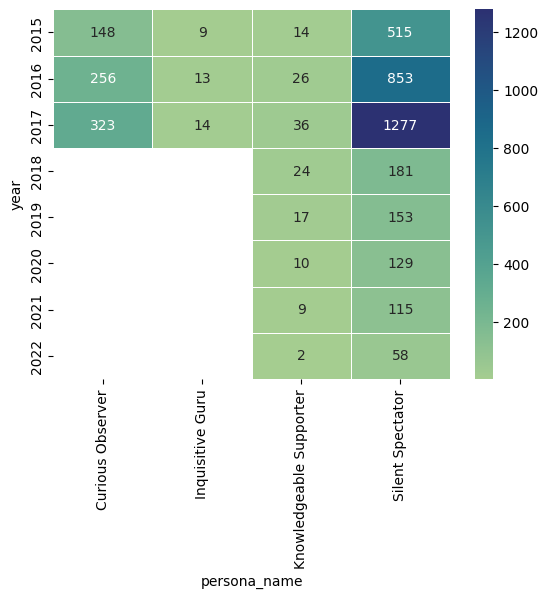

In [86]:
sns.heatmap(segmentation_year,
            annot=True,
            fmt=".0f",
            linewidth=.5,
            cmap="crest"
            )
plt.show()

Menampilkan stacked bar chart berdasarkan `persona_name` dan `year`.

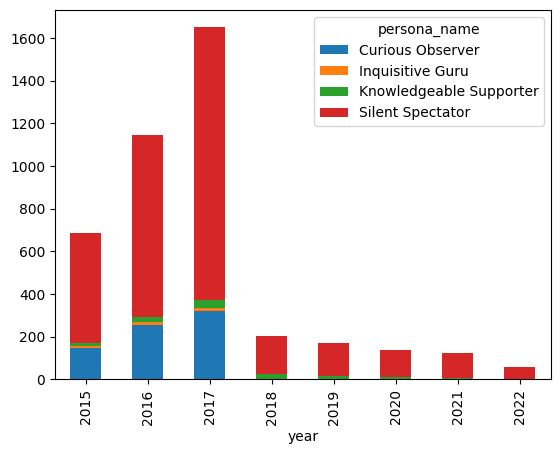

In [87]:
segmentation_year.plot(kind = 'bar', stacked = True)
plt.show()